In [130]:
import requests
import json
from DbConn import *
from datetime import datetime, timedelta

def week_dataframe(day):
    db = DbConn()
    
    select_query = """
    select moviecd, audicnt 
    from boxoffice  
    where  opendt +:day = dailydate2 and dailydate2 < TO_DATE('19/01/01', 'YY/mm/dd') and 
    order by moviecd
    """
    params = {"day":day}
    select_result = db.execute(select_query,params)

    print("첫주 작업 완료. -----")
    db.disconnect()
    return  select_result


def max_dataframe():
    db = DbConn()
    
    select_query = """
    select moviecd,  max(audiacc)
    from boxoffice 
    group by moviecd
    order by moviecd
    """
    select_result = db.execute(select_query)

    print("누적 작업 완료. -----")
    db.disconnect()
    return  select_result

print(week_dataframe(13))

# print(max_dataframe())


첫주 작업 완료. -----
[(20068576, 16109), (20078561, 5439), (20098169, 101555), (20122021, 82557), (20122787, 14975), (20123501, 75979), (20124938, 75451), (20129370, 443817), (20129787, 12890), (20130021, 3272), (20130442, 52602), (20130522, 11065), (20130561, 22362), (20130566, 5551), (20131102, 186341), (20131248, 106174), (20131262, 19115), (20132482, 4648), (20133322, 40913), (20133601, 1599), (20133602, 21754), (20133682, 3712), (20134028, 22137), (20134046, 19660), (20134082, 25714), (20134122, 5243), (20134206, 18400), (20134533, 2831), (20134587, 16563), (20134589, 34190), (20134590, 22146), (20134591, 16704), (20134594, 18530), (20134798, 152880), (20134804, 66889), (20134984, 27792), (20135386, 17593), (20135656, 24952), (20135661, 246485), (20136043, 13551), (20136057, 8633), (20136060, 2929), (20136062, 4686), (20136063, 5553), (20136064, 182412), (20136068, 190717), (20136312, 1879), (20136445, 4053), (20136800, 6689), (20136802, 19042), (20136803, 321038), (20136812, 6057), (2

In [131]:
import pandas as pd
df_week= []
for i in range(0,8):
    df_week_column_name = ['mnumber', 'dpeople+'+str(i)]
    df_week.append( pd.DataFrame(week_dataframe(i), columns=df_week_column_name) )
df_week


첫주 작업 완료. -----
첫주 작업 완료. -----
첫주 작업 완료. -----
첫주 작업 완료. -----
첫주 작업 완료. -----
첫주 작업 완료. -----
첫주 작업 완료. -----
첫주 작업 완료. -----


[       mnumber  dpeople+0
 0     20041524       6354
 1     20068576      67607
 2     20068659       8827
 3     20078561      41627
 4     20098169     274719
 5     20100211       2578
 6     20122021     467419
 7     20122787      27304
 8     20123501     551841
 9     20124047       5451
 10    20126090      60234
 11    20129370     682701
 12    20129787      66643
 13    20130021      79801
 14    20130442      79698
 15    20130522      47918
 16    20130561      58083
 17    20130566      50014
 18    20130574      26982
 19    20131102     142843
 20    20131248      72041
 21    20131262      73635
 22    20132482     121991
 23    20133322      89092
 24    20133585       6448
 25    20133601       3695
 26    20133602     177380
 27    20133603      10451
 28    20133641       7922
 29    20133682      13888
 ...        ...        ...
 997   20186501     162242
 998   20186822       8615
 999   20187427      87322
 1000  20187521       2557
 1001  20187641      61884
 

In [132]:
df_max_column_name = ['mnumber', 'sum_total_people']
df_max = pd.DataFrame(max_dataframe(), columns=df_max_column_name )
df_max.tail()

누적 작업 완료. -----


,mnumber,sum_total_people
1548,20199949,8991
1549,20199950,5234641
1550,20199951,471266
1551,20199954,8491
1552,20199981,143853


In [133]:
df = pd.merge(df_week[0],df_max, on='mnumber')

for i in range(1,8) :
    df = pd.merge(df_week[i],df, on='mnumber', how='outer')

df.tail()

,mnumber,dpeople+7,dpeople+6,dpeople+5,dpeople+4,dpeople+3,dpeople+2,dpeople+1,dpeople+0,sum_total_people
1198,20181764,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4049.0,9091.0
1199,20181879,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7206.0,38226.0
1200,20183307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1689.0,2015.0
1201,20184529,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5042.0,6370.0
1202,20187682,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1267.0,2654.0


In [134]:
for i in range(0,8) :
    df['dpeople+'+str(i)] = df['dpeople+'+str(i)].fillna(0)

df.tail()

,mnumber,dpeople+7,dpeople+6,dpeople+5,dpeople+4,dpeople+3,dpeople+2,dpeople+1,dpeople+0,sum_total_people
1198,20181764,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4049.0,9091.0
1199,20181879,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7206.0,38226.0
1200,20183307,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1689.0,2015.0
1201,20184529,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5042.0,6370.0
1202,20187682,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1267.0,2654.0


In [135]:
# df['sum_total_people'].describe()
print(df['sum_total_people'].quantile(q=0.9, interpolation='nearest'),
      df['sum_total_people'].quantile(q=0.75, interpolation='nearest'),
      df['sum_total_people'].quantile(q=0.5, interpolation='nearest'),
      df['sum_total_people'].quantile(q=0.25, interpolation='nearest'),
      df['sum_total_people'].quantile(q=0, interpolation='nearest')
     )

a = df['sum_total_people'].quantile(q=0.9, interpolation='nearest')
b = df['sum_total_people'].quantile(q=0.75, interpolation='nearest')
c = df['sum_total_people'].quantile(q=0.5, interpolation='nearest')
d = df['sum_total_people'].quantile(q=0.25, interpolation='nearest')
e = df['sum_total_people'].quantile(q=0, interpolation='nearest')
# 10%
# 25%
# 50%
# 75%
# 100%

2944333.0 986564.0 218429.0 52542.0 912.0


In [136]:
score_list = []
for i in df['sum_total_people']:
    if i >= a:
        score_list.append('A')
    elif i >= b:
        score_list.append('B')
    elif i >= c:
        score_list.append('C')
    elif i >= d:
        score_list.append('D')
    else :
        score_list.append('F')

        
df['score'] = score_list
df['score'].head()

0    C
1    C
2    A
3    C
4    A
Name: score, dtype: object

In [137]:
df.groupby('score')['score'].count()

score
A    104
B    153
C    257
D    257
F    432
Name: score, dtype: int64

In [138]:
X = df.drop(['mnumber', 'sum_total_people','score'], axis=1)
X.tail()

,dpeople+7,dpeople+6,dpeople+5,dpeople+4,dpeople+3,dpeople+2,dpeople+1,dpeople+0
1198,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4049.0
1199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7206.0
1200,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1689.0
1201,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5042.0
1202,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1267.0


In [139]:
Y=df['score']

In [140]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

# train, test 7:3
X_train, X_test, y_train, y_test = train_test_split(X,Y,
                                                   test_size=0.3, random_state=999)

In [141]:
model = RandomForestClassifier(n_estimators=10, random_state=999)
model.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=999, verbose=0, warm_start=False)

In [142]:
model.score(X_train,y_train)

0.995249406175772

In [143]:
model.score(X_test,y_test)

0.9058171745152355

In [144]:
# cunfuse matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

conMat = pd.DataFrame(confusion_matrix(y_test,y_pred),
                         index=['True[A]', 'True[B]', 'True[C]', 'True[D]',  'True[F]'],
                         columns=['Pred[A]', 'Pred[B]', 'Pred[C]', 'Pred[D]', 'Pred[F]'])

 # 정확도, precision, recall, f1
conMat

,Pred[A],Pred[B],Pred[C],Pred[D],Pred[F]
True[A],29,1,0,1,0
True[B],8,36,4,0,0
True[C],0,1,69,5,0
True[D],0,0,4,67,2
True[F],0,0,2,6,126


In [145]:
feat_labels = X.columns
feat_labels

Index(['dpeople+7', 'dpeople+6', 'dpeople+5', 'dpeople+4', 'dpeople+3',
       'dpeople+2', 'dpeople+1', 'dpeople+0'],
      dtype='object')

 1) dpeople+3                      0.233913
 2) dpeople+7                      0.158894
 3) dpeople+5                      0.162789
 4) dpeople+6                      0.121507
 5) dpeople+1                      0.103050
 6) dpeople+0                      0.068859
 7) dpeople+2                      0.092751
 8) dpeople+4                      0.058237


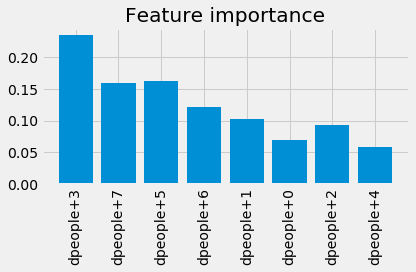

In [146]:
import numpy as np

plt.style.use('fivethirtyeight')

importances = model.feature_importances_
indices = np.argsort(importances[::-1])
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f"%(f+1,30,feat_labels[indices[f]],
                         importances[indices[f]]))
plt.title('Feature importance')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
plt.tight_layout()
plt.show()

In [ ]:
# 1~7 일 정도의 데이터가 제일 중요하고 이후날짜의 데이터는 크게 중요치 않음